## TASK 2.1 Preprocessing

In [2]:
# importing important library

import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [3]:
df_train=pd.read_csv('E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\clean_trainScore.csv')
df_test=pd.read_csv('E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\test.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df_test.shape

(41088, 8)

In [6]:
df_train.shape

(1017209, 23)

In [7]:
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,31,31,2015-07-31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,30,31,2015-07-30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,29,31,2015-07-29,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,28,31,2015-07-28,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,27,31,2015-07-27,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


In [8]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'Dates', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'SalesperCustomer'],
      dtype='object')

### need to extract

* weekdays
* weekends
* number of days to holidays
* Number of days after holiday
* Beginning of month, mid month and ending of month

In [9]:
train_df = df_train.copy()

In [10]:
#converting Dates column into datetime formate
train_df['Dates'] = pd.to_datetime(train_df['Dates'])

In [11]:
#Addition of weekdays column into Dataframe and +1 is to get monday at 1
train_df['weekdays'] = train_df['Dates'].dt.weekday + 1

In [12]:
train_df['weekdays'].head()


0    5
1    4
2    3
3    2
4    1
Name: weekdays, dtype: int64

In [13]:
# weekend
train_df['Weekends'] = train_df['Dates'].dt.weekday + 1

In [14]:
# This code will replace sunday and saturday as 0 
train_df['Weekends'] = train_df['Weekends'].mask(train_df['Weekends'].values >= 6, 0)

In [15]:
train_df[['weekdays','Weekends']].head()

,weekdays,Weekends
0,5,5
1,4,4
2,3,3
3,2,2
4,1,1


In [16]:
#creating csv file for future reference
train_df.to_csv('train_df.csv', index=False)

In [17]:
train_df.weekdays.dtype

dtype('int64')

In [18]:
# checking weekends 
train_df.query('Weekends == 0').head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,weekdays,Weekends
5,1,7,0.0,0.0,0,0,0,0,2015,7,26,30,2015-07-26,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.000000,7,0
6,1,6,4364.0,500.0,1,0,0,0,2015,7,25,30,2015-07-25,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.728000,6,0
12,1,7,0.0,0.0,0,0,0,0,2015,7,19,29,2015-07-19,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.000000,7,0
13,1,6,4406.0,512.0,1,0,0,0,2015,7,18,29,2015-07-18,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.605469,6,0
19,1,7,0.0,0.0,0,0,0,0,2015,7,12,28,2015-07-12,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.000000,7,0


In [19]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [20]:
train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
Dates                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
SalesperCustomer             0
weekdays                     0
Weekends                     0
dtype: int64

In [21]:
train_df.dtypes

Store                                 int64
DayOfWeek                             int64
Sales                               float64
Customers                           float64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
WeekOfYear                            int64
Dates                        datetime64[ns]
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
SalesperCustomer                

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Sales                      1017209 non-null  float64       
 3   Customers                  1017209 non-null  float64       
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   Year                       1017209 non-null  int64         
 9   Month                      1017209 non-null  int64         
 10  Day                        1017209 non-null  int64         
 11  WeekOfYear                 1017209 no

## selecting features

In [23]:
columns = ['Sales','Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

In [55]:
sample_size = 10000
sampled_df = train_df[columns].sample(sample_size)


## Separet Test and train files
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,WeekOfYear,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
61893,68,2,1,1,0,19,47,11,2013,a,c,250.0,1
10157,11,3,1,0,1,24,30,7,2013,a,c,960.0,1
583928,641,6,1,0,0,25,4,1,2014,a,c,610.0,1
936811,1028,4,1,1,0,16,16,4,2015,a,a,150.0,1
568679,624,7,0,0,0,29,26,6,2014,a,c,6920.0,0


In [56]:
train_y.shape

(10000, 1)

## Label Encoding

In [57]:
lb = LabelEncoder()
train_x['StoreType'] = lb.fit_transform(train_x['StoreType'])
train_x['Assortment'] = lb.fit_transform(train_x['Assortment'])

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 61893 to 218475
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                10000 non-null  int64  
 1   DayOfWeek            10000 non-null  int64  
 2   Open                 10000 non-null  int64  
 3   Promo                10000 non-null  int64  
 4   SchoolHoliday        10000 non-null  int64  
 5   Day                  10000 non-null  int64  
 6   WeekOfYear           10000 non-null  int64  
 7   Month                10000 non-null  int64  
 8   Year                 10000 non-null  int64  
 9   StoreType            10000 non-null  int32  
 10  Assortment           10000 non-null  int32  
 11  CompetitionDistance  10000 non-null  float64
 12  Promo2               10000 non-null  int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 1015.6 KB


In [58]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = x_scaler.fit_transform(train_x)
X = train_x
Y = y_scaler.fit_transform(train_y)
Y=train_y

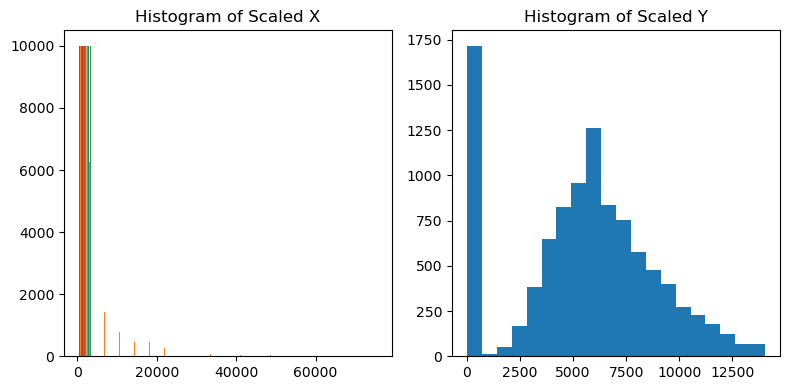

In [59]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(X, bins=20)
plt.title('Histogram of Scaled X')

plt.subplot(1, 2, 2)
plt.hist(Y, bins=20)
plt.title('Histogram of Scaled Y')

plt.tight_layout()
plt.show()


In [60]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=35)

In [61]:
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth=25, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, random_state=0)

In [62]:
# score of the model
score = rf_reg.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

Prediction Score of the Model is 73.96%


## Building models with sklearn pipelines

In [63]:
## Prepare the training and test features
x = train_x
y = train_y

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

### Creating Pipeline

In [64]:
rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regretion', RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regretion', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regretion', DecisionTreeRegressor(random_state = 0)  )
])

### fitting

In [65]:
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

Pipeline(steps=[('scaler3', MinMaxScaler()),
                ('dt_regretion', DecisionTreeRegressor(random_state=0))])

In [66]:
# printing score
rfr_score = rfr.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print(f"Prediction Score of the RandomForestRegretion is {round(rfr_score * 100, 2)}%")
print(f"Prediction Score of the LinearRegretion is {round(lr_score * 100, 2)}%")
print(f"Prediction Score of the DecisionTree is {round(dt_score * 100, 2)}%")


Prediction Score of the RandomForestRegretion is 67.48%
Prediction Score of the LinearRegretion is 64.71%
Prediction Score of the DecisionTree is 55.88%


## loss function

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [68]:
#Make a prediction

rfr_prediction = rfr.predict(X_test)
lr_prediction = lr.predict(X_test)
dt_prediction = dt.predict(X_test)



In [69]:
# Evaluate RandomForestRegressor
rf_mae = mean_absolute_error(y_test, rfr_prediction)
rf_mse = mean_squared_error(y_test, rfr_prediction)
rf_rmse = mean_squared_error(y_test, rfr_prediction, squared=False)  # RMSE
rf_r2 = r2_score(y_test, rfr_prediction)

In [70]:
# Evaluate LinearRegression
lr_mae = mean_absolute_error(y_test, lr_prediction)
lr_mse = mean_squared_error(y_test, lr_prediction)
lr_rmse = mean_squared_error(y_test, lr_prediction, squared=False)  # RMSE
lr_r2 = r2_score(y_test, lr_prediction)

In [71]:
# Evaluate DecisionTreeRegressor
dt_mae = mean_absolute_error(y_test, dt_prediction)
dt_mse = mean_squared_error(y_test, dt_prediction)
dt_rmse = mean_squared_error(y_test, dt_prediction, squared=False)  # RMSE
dt_r2 = r2_score(y_test, dt_prediction)

## Printing loss result

In [72]:
print(f"RandomForest Mean Square Loss : {rf_rmse}")
print(f"Linear Mean Square Loss : {lr_rmse}")
print(f"DecisionTree Mean Square Loss : {dt_rmse }")
print(f"RandomForest mae : {rf_mae}")

RandomForest Mean Square Loss : 1886.243375046013
Linear Mean Square Loss : 1964.850170006086
DecisionTree Mean Square Loss : 2197.0402153806835
RandomForest mae : 1364.6131313240478


# Post Prediction analysis

Text(0.5, 1.0, 'RandomForestRegretion Feature Importance')

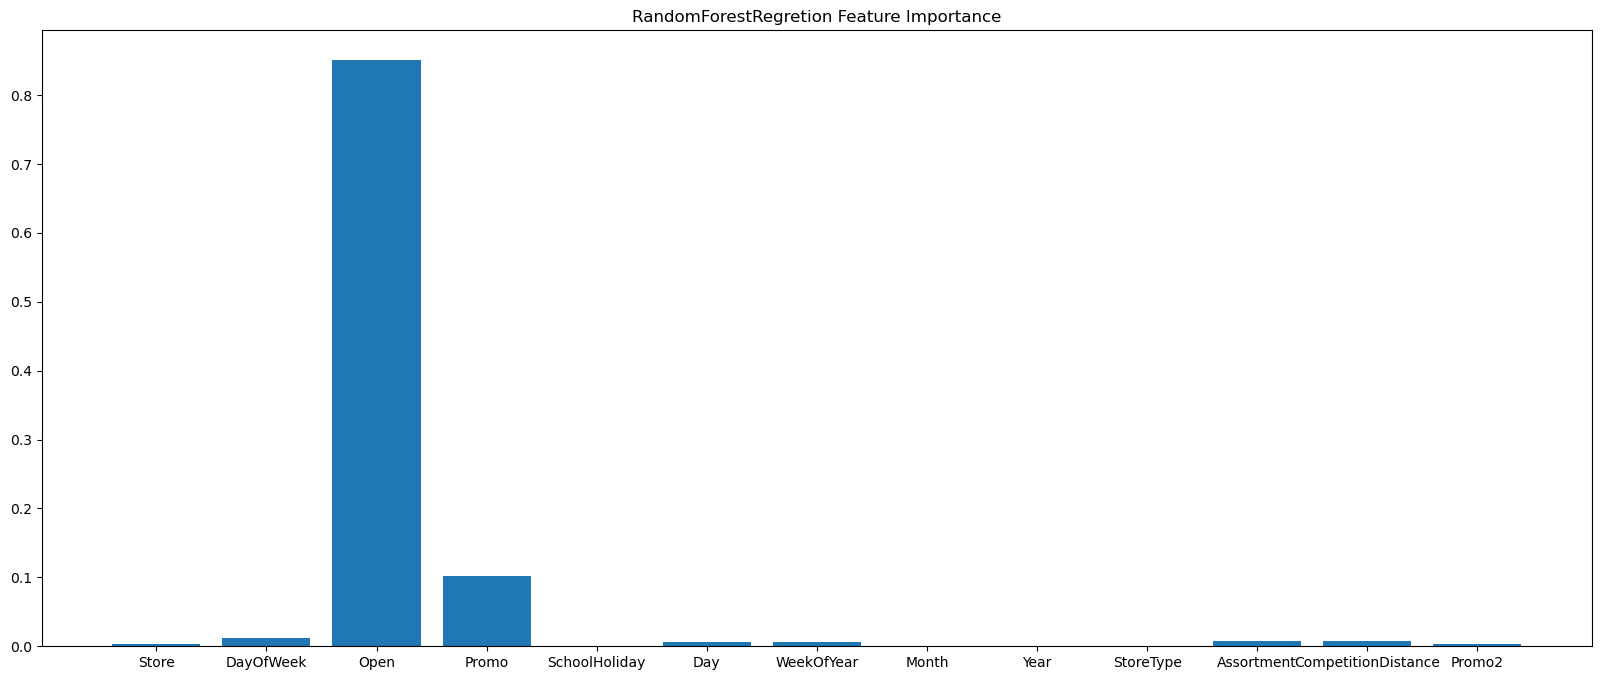

In [73]:
important_features = rfr[1].feature_importances_
plt.figure(figsize=(20, 8))
plt.bar(feature_columns, important_features)
plt.title('RandomForestRegretion Feature Importance')

Text(0.5, 1.0, 'LinearRegretion Feature Importance')

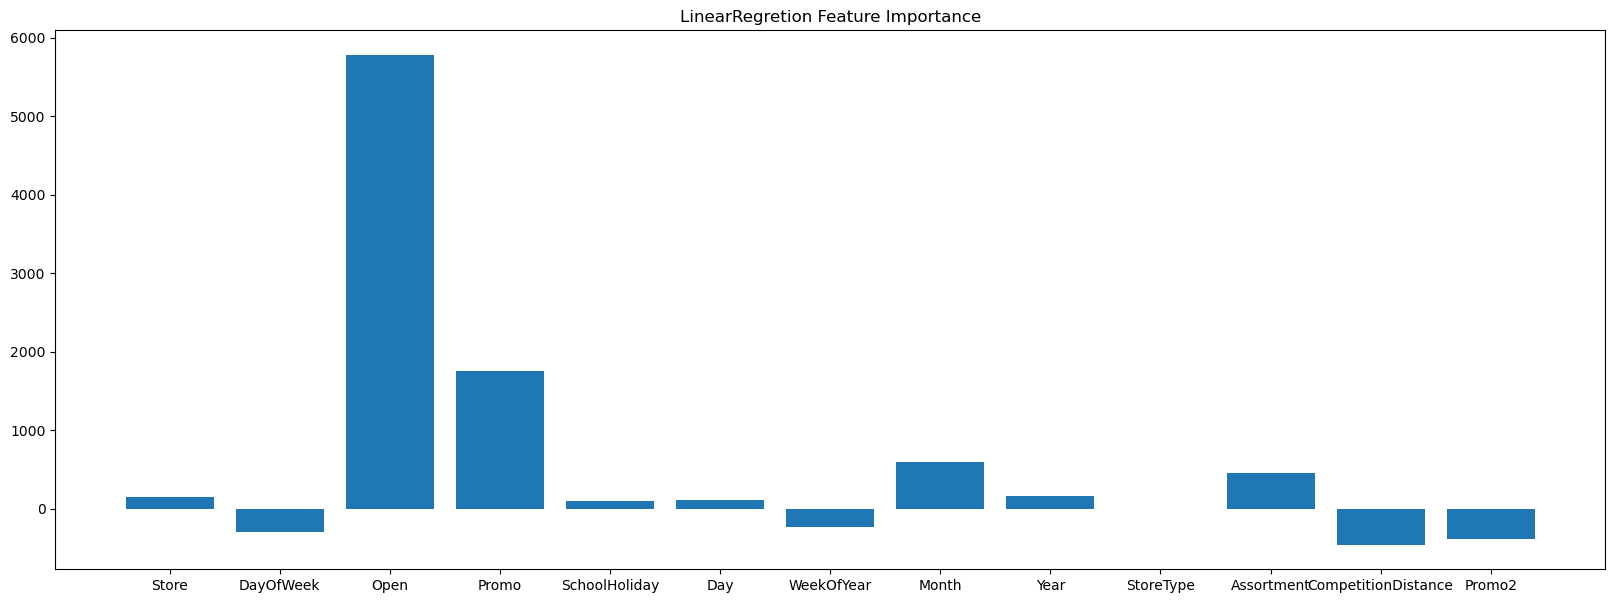

In [74]:
important_features = lr[1].coef_[0]
plt.figure(figsize=(20, 7))
plt.bar(feature_columns, list(important_features))
plt.title("LinearRegretion Feature Importance")

<BarContainer object of 13 artists>

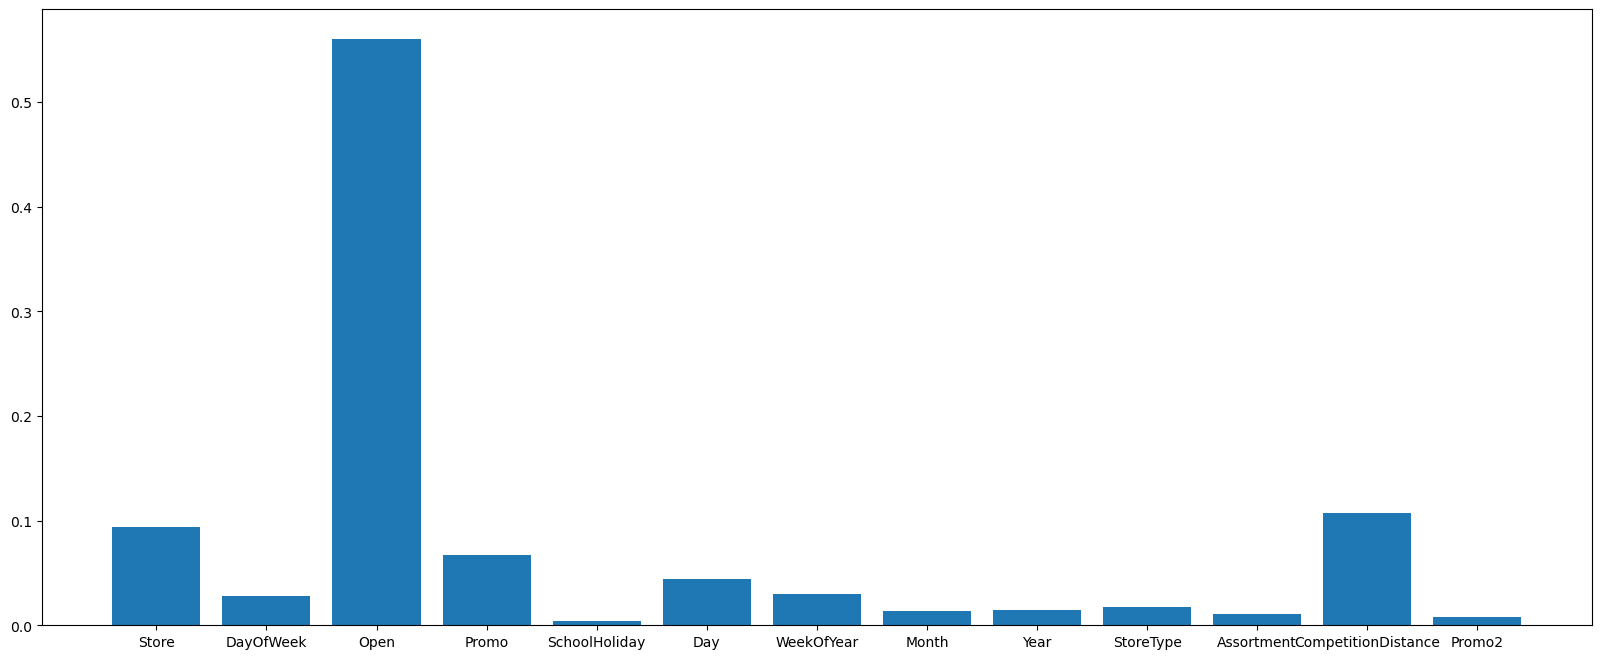

In [75]:
important_features = dt[1].feature_importances_
plt.figure(figsize=(20, 8))
plt.bar(feature_columns, important_features)

## In the post-analysis summary:

* Certain features emerge as exceptionally important, notably "Open" being the most influential feature.
* "Promo" also exhibits significant impact within the model.
* However, a few features display negligible or no positive influence on sales.

## Serialize models

In [76]:
import pickle

In [77]:
import pickle
from time import gmtime, strftime
import os

# Define your directory
directory = '../models/'
os.makedirs(directory, exist_ok=True)

time = strftime("%Y-%m-%d-%H-%M-%S", gmtime())
reg_model_file_name = f'reg-{time}.pkl'
lr_model_file_name = f'lt-{time}.pkl'
dt_model_file_name = f'dt-{time}.pkl'

files = [reg_model_file_name, lr_model_file_name, dt_model_file_name]

# Assuming rfr, lr, and dt models are defined earlier in your code
models = [rfr, lr, dt]

for i in range(len(files)):
    with open(directory + files[i], 'wb') as file_obj:
        pickle.dump(models[i], file_obj)


In [78]:
import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# Serialize and save models with timestamp
rf_model_file_name = f"{timestamp}_rf_model.pkl"
lr_model_file_name = f"{timestamp}_lr_model.pkl"
dt_model_file_name = f"{timestamp}_dt_model.pkl"

joblib.dump(rfr, rf_model_file_name)
joblib.dump(lr, lr_model_file_name)
joblib.dump(dt, dt_model_file_name)



['07-01-2024-15-13-45-465213_dt_model.pkl']

## Loading models

In [79]:
rf_model = joblib.load(rf_model_file_name)
lr_model = joblib.load(lr_model_file_name)
dt_model = joblib.load(dt_model_file_name)

## getting prediction score of models 

In [80]:
dt_score = dt_model.score(X_test, y_test)
dt_score

0.5588110370918622

In [81]:
lr_score = lr_model.score(X_test, y_test)
lr_score

0.647135877311261

In [54]:
rf_score = rf_model.score(X_test, y_test)
lr_score

0.5893277795261831